In [45]:
!pip install pmdarima

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima

In [47]:
pd_airpassengers = pd.read_csv('AirPassengers.csv')
pd_airpassengers

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [48]:
date_parse = lambda x: datetime.strptime(x, '%Y-%m')
pd_airpassengers = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=date_parse)

<ipython-input-48-b89653d8388a>:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  pd_airpassengers = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month', date_parser=date_parse)


In [49]:
times_series = pd_airpassengers['#Passengers']
times_series.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [50]:
times_series[1]

<ipython-input-50-f3f5942f8d6e>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  times_series[1]


118

In [51]:
times_series['1949-02']

,#Passengers
Month,
1949-02-01,118


In [52]:
times_series['1950-01-01':'1950-07-31']

,#Passengers
Month,
1950-01-01,115
1950-02-01,126
1950-03-01,141
1950-04-01,135
1950-05-01,125
1950-06-01,149
1950-07-01,170


In [53]:
times_series[:'1950-07-31']

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [54]:
times_series.index.max()

Timestamp('1960-12-01 00:00:00')

In [55]:
times_series.index.min()

Timestamp('1949-01-01 00:00:00')

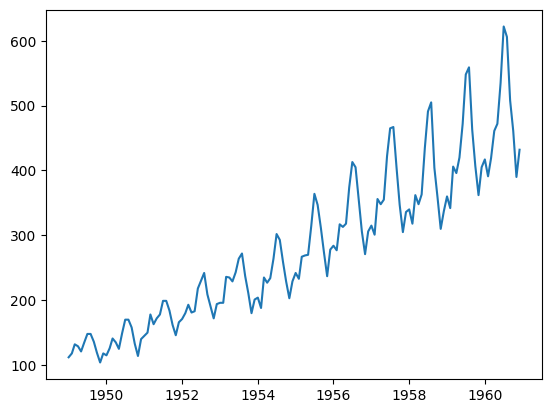

In [56]:
plt.plot(times_series)

<ipython-input-57-e208d553aa27>:1: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  time_series_year = times_series.resample('A').sum()


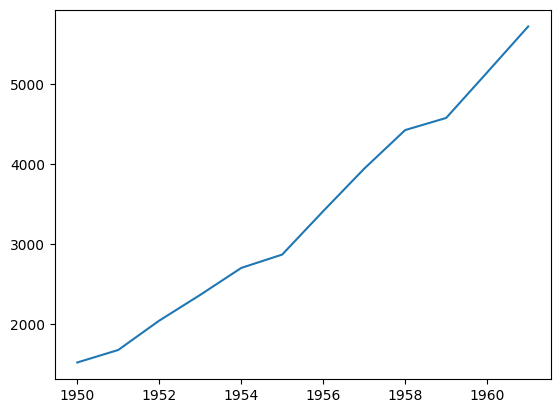

In [57]:
time_series_year = times_series.resample('A').sum()
plt.plot(time_series_year)

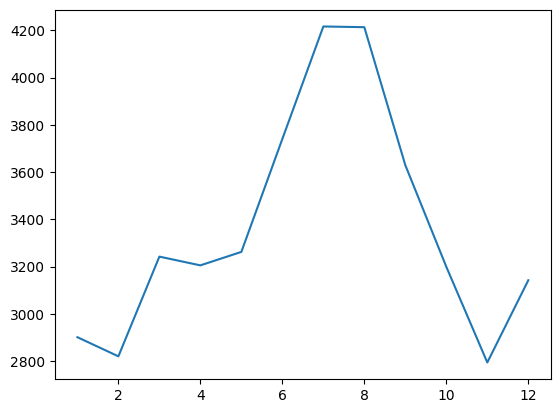

In [58]:
times_series_months = times_series.groupby([lambda x: x.month]).sum()
plt.plot(times_series_months)

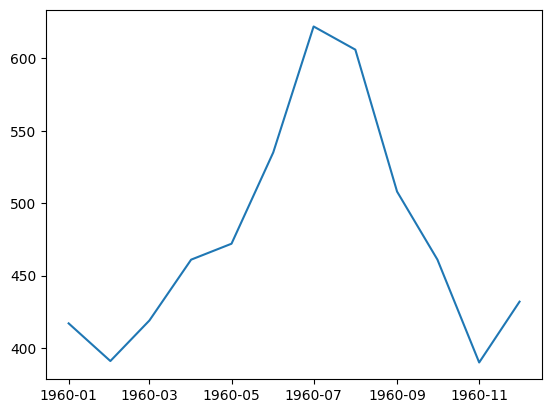

In [59]:
times_series_data = times_series['1960-01-01':'1960-12-01']
plt.plot(times_series_data)

In [60]:
decompose = seasonal_decompose(times_series)
seasonal = decompose.seasonal
tendence = decompose.trend
random = decompose.resid

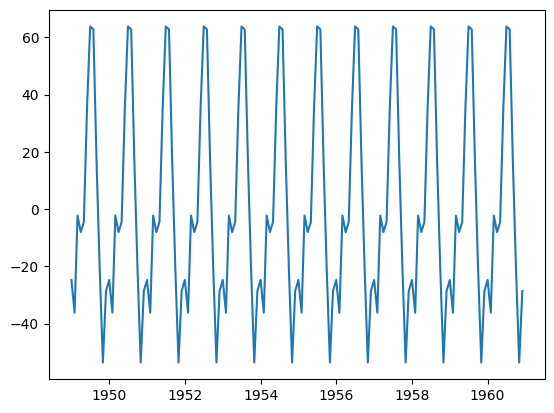

In [61]:
plt.plot(seasonal)

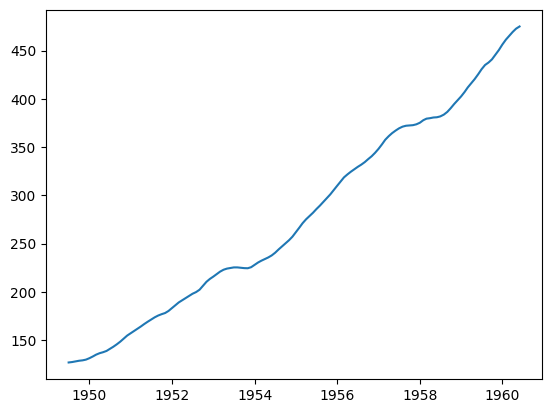

In [62]:
plt.plot(tendence)

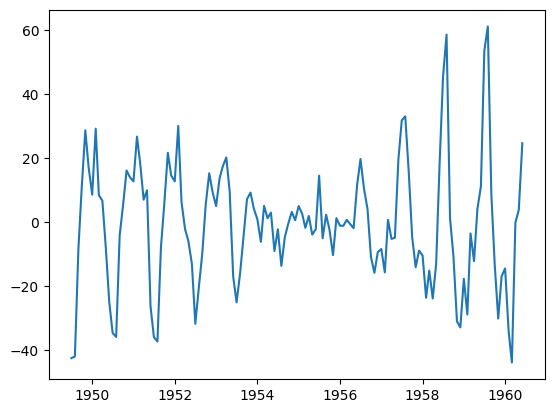

In [63]:
plt.plot(random)

In [65]:
model = auto_arima(times_series,order=(2,1,2))

In [66]:
prediction = model.predict(n_periods=12)

In [67]:
prediction

,0
1961-01-01,467.573736
1961-02-01,490.494460
1961-03-01,509.136849
1961-04-01,492.554702
1961-05-01,495.305965
1961-06-01,475.947817
1961-07-01,476.339865
1961-08-01,475.552147
1961-09-01,472.353805
1961-10-01,483.889647


In [68]:
train = times_series[:130]
test = times_series[130:]

test.index.min(), test.index.max()

(Timestamp('1959-11-01 00:00:00'), Timestamp('1960-12-01 00:00:00'))

In [69]:
model_2 = auto_arima(train)

In [70]:
prediction_2 = pd.DataFrame(model_2.predict(n_periods=14), index=test.index)
prediction_2.columns = ['#Passengers2']
prediction_2

,#Passengers2
Month,
1959-11-01,357.690511
1959-12-01,334.857449
1960-01-01,342.488592
1960-02-01,375.944534
1960-03-01,424.126300
1960-04-01,473.151468
1960-05-01,510.388415
1960-06-01,527.724284
1960-07-01,523.268370


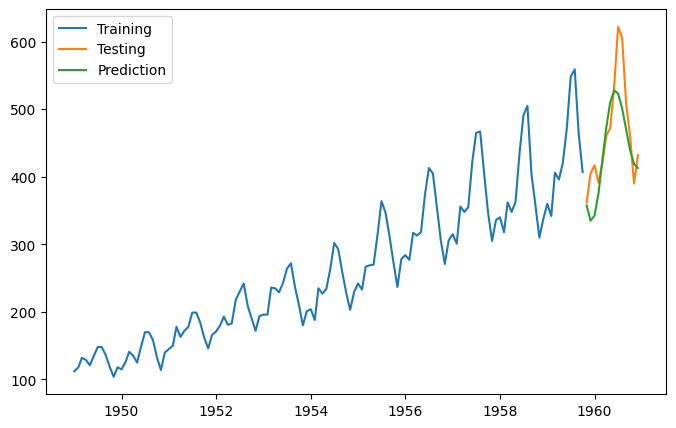

In [72]:
plt.figure(figsize=(8,5))
plt.plot(train,label='Training')
plt.plot(test,label='Testing')
plt.plot(prediction_2,label='Prediction')
plt.legend()
plt.show()